# Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet():
    original_train_data = pd.read_csv('data/train.csv')
    original_test_data = pd.read_csv('data/test.csv')
    train_data = original_train_data.copy()
    test_data = original_test_data.copy()
    return train_data, test_data

def showDataSet(dataFrame,limit = 10,message = "Explored Data"):
    print("="*50,"{show_data}".format(show_data =message),"="*50)
    return dataFrame.head(limit)

def showStatistic(dataFrame,describe = True):
    if describe == True:
        return dataFrame.describe()
    else:
        return dataFrame.info()

def showMissingData(dataFrame):
    total = dataFrame.isnull().sum().sort_values(ascending = False)
    percent_1 = dataFrame.isnull().sum() / train_data.isnull().count() * 100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total','%'])
    return missing_data.head(len(dataFrame.columns))

In [3]:
train_data, test_data = loadDataSet()

In [4]:
showDataSet(train_data)

================================================== Explored Data ==================================================


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#showStatistic(train_data, describe = False)
showMissingData(train_data)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


## What features could contribute to a high survival rate!

# Age and Sex

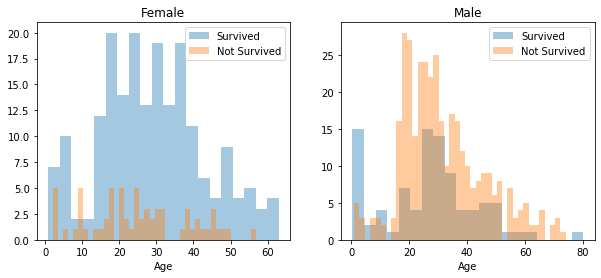

In [7]:
import seaborn as sns
survived = "Survived"
not_survived = "Not Survived"
def ageSexGrapgh():
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
    women = train_data[train_data['Sex'] == 'female']
    men = train_data[train_data['Sex'] == 'male']
    ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
    ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
    ax.legend()
    ax.set_title('Female')

    ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde =False)
    ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False)
    ax.legend()
    ax.set_title('Male')
ageSexGrapgh()

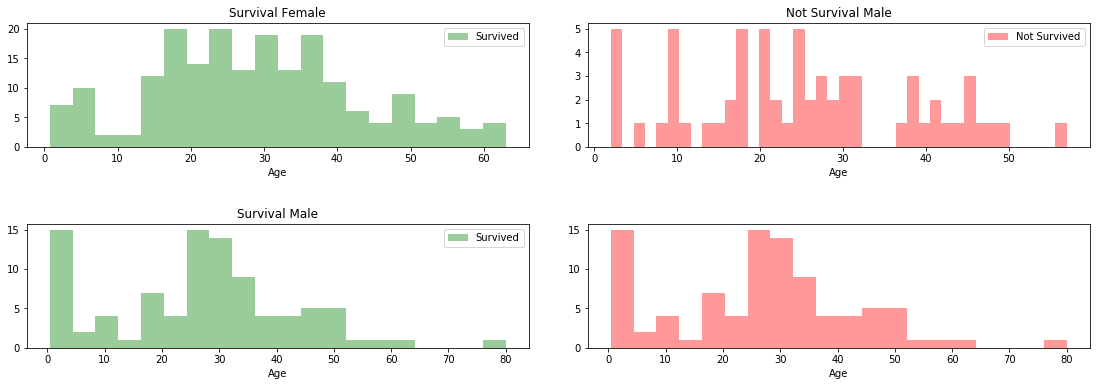

In [8]:
def ageSexGraph():
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 6))
    women = train_data[train_data['Sex'] == 'female']
    men = train_data[train_data['Sex'] == 'male']
    ax1 = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived,color = 'green', ax = axes[0][0], kde =False)
    ax2 = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived,color = 'red', ax = axes[0][1], kde =False)
    ax1.legend()
    ax1.set_title('Survival Female')
    ax2.legend()
    ax2.set_title('Not Survival Female')

    ax1 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived,color = 'green', ax = axes[1][0], kde =False)
    a2 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = not_survived,color = 'red', ax = axes[1][1], kde =False)
    ax1.legend()
    ax1.set_title('Survival Male')
    ax2.legend()
    ax2.set_title('Not Survival Male')
    fig. tight_layout(pad=3.0)
ageSexGraph()

# You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

# Now let Analyse survival rate correspond to Pclass